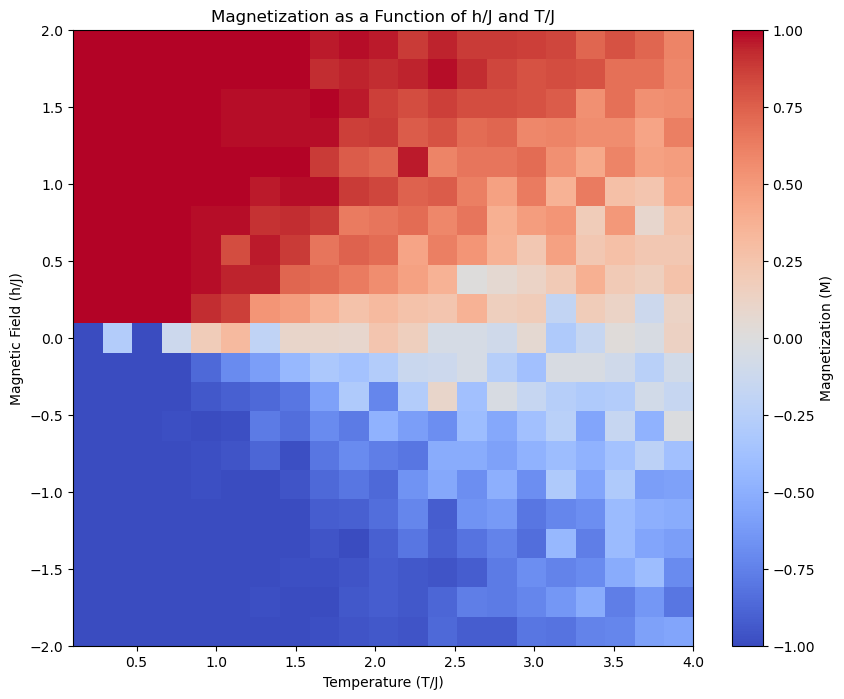

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of spins
J = 1.0  # Interaction strength (reference scale)
steps = 10000  # Number of Monte Carlo steps

# Define ranges for h/J and T/J
h_over_J_values = np.linspace(-2, 2, 21)  # h/J values
T_over_J_values = np.linspace(0.1, 4, 21)  # T/J values

# Function to calculate the energy of the system
def calculate_energy(spins, J, h):
    energy = -J * np.sum(spins[:-1] * spins[1:])  # Nearest neighbor interaction
    energy -= h * np.sum(spins)  # External magnetic field contribution
    return energy

# Monte Carlo simulation using the Metropolis algorithm
def metropolis(spins, J, h, T, steps):
    for _ in range(steps):
        # Randomly select a spin to flip
        i = np.random.randint(0, N)
        proposed_spins = spins.copy()
        proposed_spins[i] *= -1  # Flip the spin

        # Calculate the change in energy
        delta_E = calculate_energy(proposed_spins, J, h) - calculate_energy(spins, J, h)

        # Accept or reject the flip based on the Metropolis criterion
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            spins = proposed_spins

    return spins

# Initialize array to store magnetization results
magnetization_grid = np.zeros((len(h_over_J_values), len(T_over_J_values)))

# Loop over h/J and T/J values
for i, h_over_J in enumerate(h_over_J_values):
    for j, T_over_J in enumerate(T_over_J_values):
        # Calculate h and T from h/J and T/J
        h = h_over_J * J
        T = T_over_J * J

        # Initialize spin configuration randomly
        spins = np.random.choice([-1, 1], size=N)

        # Run the simulation
        final_spins = metropolis(spins, J, h, T, steps)

        # Calculate the magnetization (average spin)
        magnetization = np.mean(final_spins)
        magnetization_grid[i, j] = magnetization

# Plot the heatmap of magnetization vs h/J and T/J
plt.figure(figsize=(10, 8))
plt.imshow(magnetization_grid, extent=[T_over_J_values.min(), T_over_J_values.max(), h_over_J_values.min(), h_over_J_values.max()],
           origin="lower", aspect="auto", cmap="coolwarm")
plt.colorbar(label="Magnetization (M)")
plt.xlabel("Temperature (T/J)")
plt.ylabel("Magnetic Field (h/J)")
plt.title("Magnetization as a Function of h/J and T/J")
plt.show()